# Aula 004 - Data Viz - Seaborn
___

Seaborn é uma biblioteca construída com base no matplotlib. É poderosa para demonstrar rapidamente relações entre dados e visualizações estatísticas.

In [2]:
## importando as bibs
import matplotlib.pyplot as plt
import seaborn as sns

## importando o pandas
import pandas as pd

## importando o numpy
import numpy as np

## warnings
import warnings
warnings.filterwarnings('ignore')

## Gráfico de contagem
___

O método mais fácil de fazer a contagem da frequência de variáveis categóricas é utilizando o ```.countplot()```, ele automaticamente cria uma barra para cada possível valor da variável categórica e conta quantas vezes cada um desses valores aparece.

In [5]:
df = pd.read_csv('data/summer2016.csv')

<AxesSubplot:xlabel='Medal', ylabel='count'>

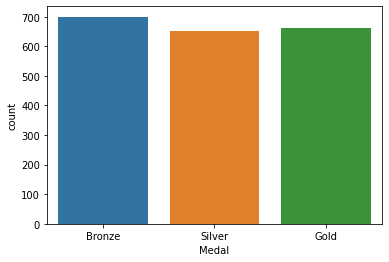

In [7]:
sns.countplot(df.Medal)

Podemos utilizar um axe do matplotlib para nosso gráfico no seaborn.

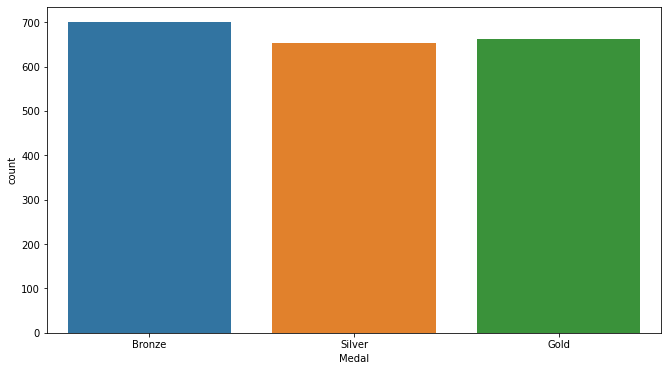

In [11]:
f, ax = plt.subplots(figsize=(11,6))

sns.countplot(df.Medal,ax=ax)
plt.show()

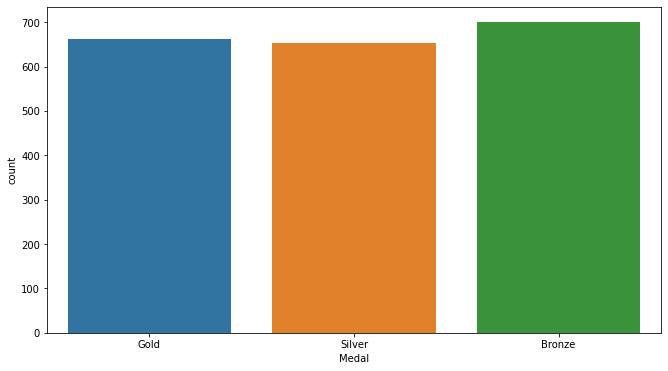

In [12]:
## trocando a ordem das medalhas
f, ax = plt.subplots(figsize=(11,6))

sns.countplot(df.Medal,ax=ax,order=['Gold','Silver','Bronze'])
plt.show()

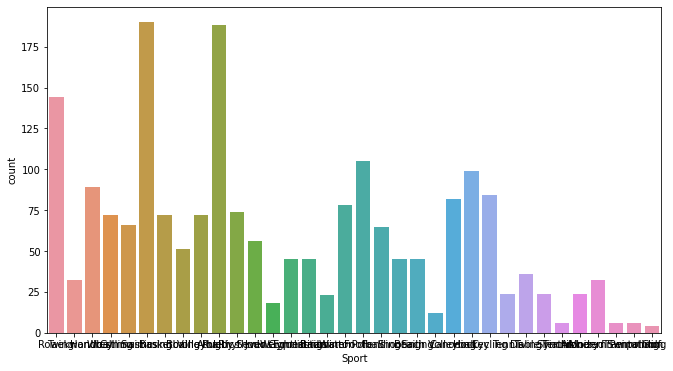

In [22]:
## quantos atletas eu tenho em cada esporte
f, ax = plt.subplots(figsize=(11,6))

sns.countplot(df.Sport,ax=ax)
plt.show()

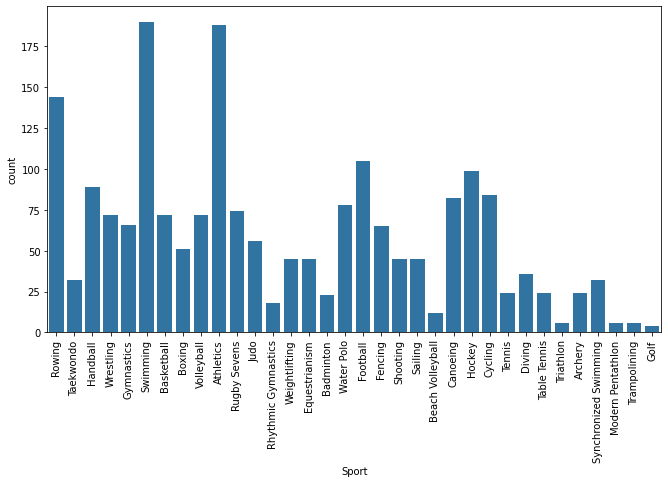

In [28]:
## quantos atletas eu tenho em cada esporte
f, ax = plt.subplots(figsize=(11,6))

sns.countplot(df.Sport,color='tab:blue',ax=ax)

ax.set_xticklabels(df.Sport.unique(),rotation=90)
plt.show()

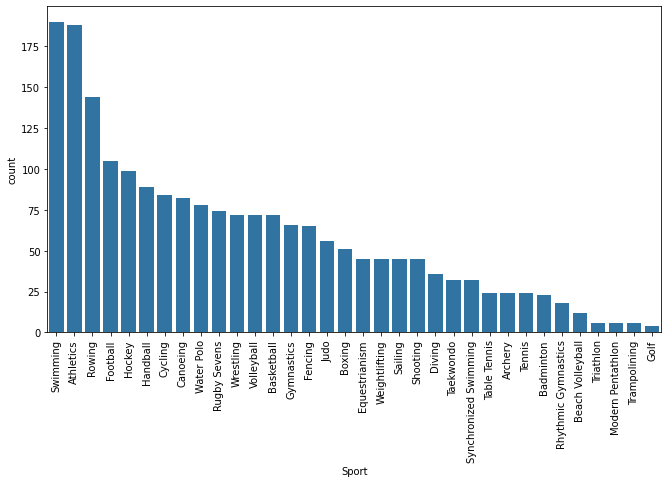

In [36]:
## quantos atletas eu tenho em cada esporte
f, ax = plt.subplots(figsize=(11,6))

sns.countplot(df.Sport,color='tab:blue',ax=ax,order=df.Sport.value_counts().index)

ax.set_xticklabels(df.Sport.value_counts().index,rotation=90)
plt.show()

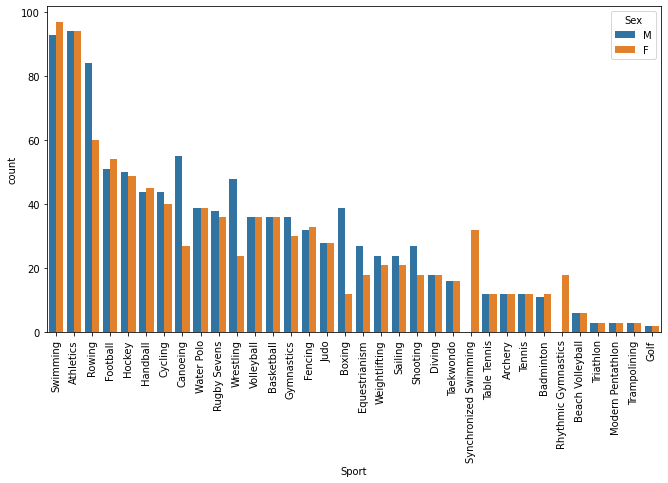

In [40]:
## quantos atletas homens e mulheres temos em cada esporte
f, ax = plt.subplots(figsize=(11,6))

sns.countplot(x='Sport',
              data=df,
              hue='Sex',
              ax=ax,
              dodge=True,
              order=df.Sport.value_counts().index)

ax.set_xticklabels(df.Sport.value_counts().index,rotation=90)
plt.show()

## Gráfico de dispersão
___

In [57]:
df = pd.read_csv('data/countries-of-the-world.csv',decimal=',')
df.columns = [x.lower().replace('.','').replace(' ','_') for x in df.columns]

In [58]:
df.head()

,country,region,population,area_(sq_mi),pop_density_(per_sq_mi),coastline_(coast/area_ratio),net_migration,infant_mortality_(per_1000_births),gdp_($_per_capita),literacy_(%),phones_(per_1000),arable_(%),crops_(%),other_(%),climate,birthrate,deathrate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [64]:
regioes = df.region.value_counts().head(2).index

In [65]:
df = df[df.region.isin(regioes)]

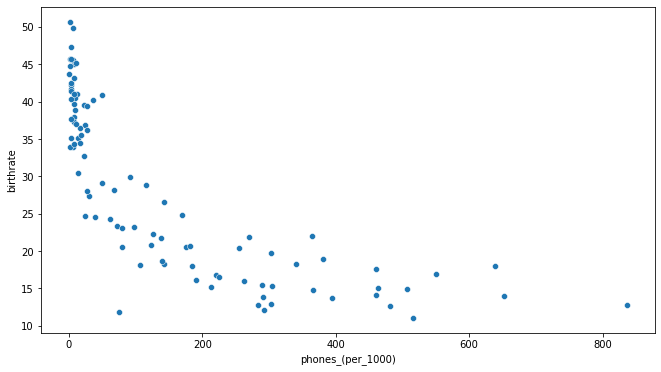

In [66]:
f, ax = plt.subplots(figsize=(11,6))

sns.scatterplot(x='phones_(per_1000)',
                y='birthrate',
                data=df,
                ax=ax)

plt.show()

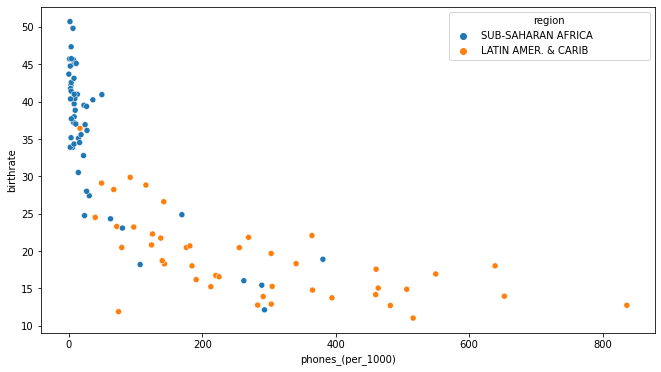

In [67]:
f, ax = plt.subplots(figsize=(11,6))

sns.scatterplot(x='phones_(per_1000)',
                y='birthrate',
                hue='region',
                data=df,
                ax=ax)

plt.show()

In [70]:
df.region.unique()

array(['SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    '],
      dtype=object)

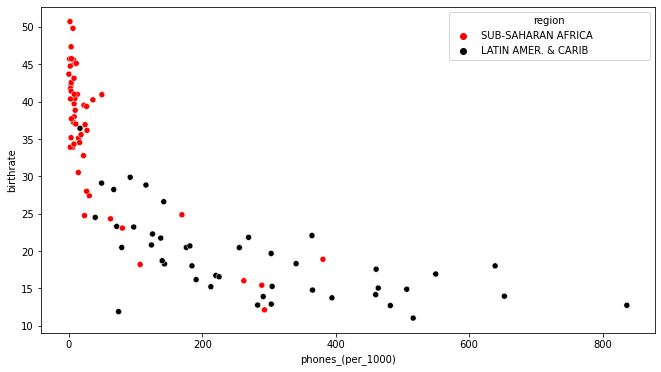

In [71]:
f, ax = plt.subplots(figsize=(11,6))

cores = {'SUB-SAHARAN AFRICA                 ':'red',
         'LATIN AMER. & CARIB    ':'black'}

sns.scatterplot(x='phones_(per_1000)',
                y='birthrate',
                hue='region',
                palette=cores,
                data=df,
                ax=ax)

plt.show()

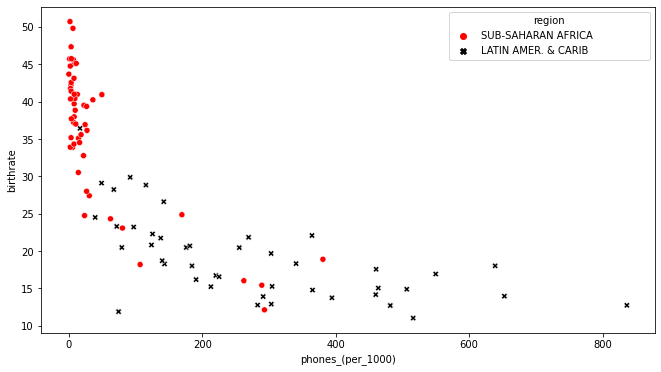

In [73]:
f, ax = plt.subplots(figsize=(11,6))

cores = {'SUB-SAHARAN AFRICA                 ':'red',
         'LATIN AMER. & CARIB    ':'black'}

sns.scatterplot(x='phones_(per_1000)',
                y='birthrate',
                hue='region',
                style='region',
                palette=cores,
                data=df,
                ax=ax)

plt.show()

## Plots relacionais
___

Os plots relacionais são usados para criar análises entre duas variáveis e que podem resultar em múltiplots plots menores.

In [79]:
df = pd.read_csv('data/mpg.csv')

In [80]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


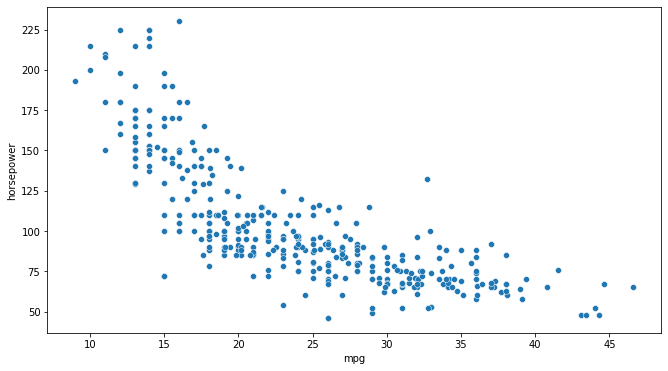

In [87]:
f, ax = plt.subplots(figsize=(11,6))

sns.scatterplot(x='mpg',
                y='horsepower',
                data=df,
                ax=ax)

plt.show()

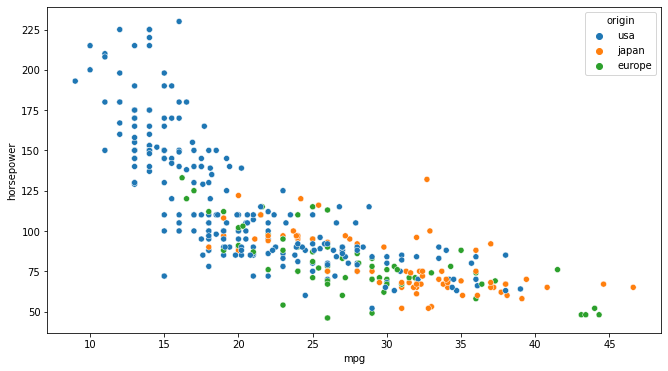

In [88]:
f, ax = plt.subplots(figsize=(11,6))

sns.scatterplot(x='mpg',
                y='horsepower',
                hue='origin',
                data=df,
                ax=ax)

plt.show()

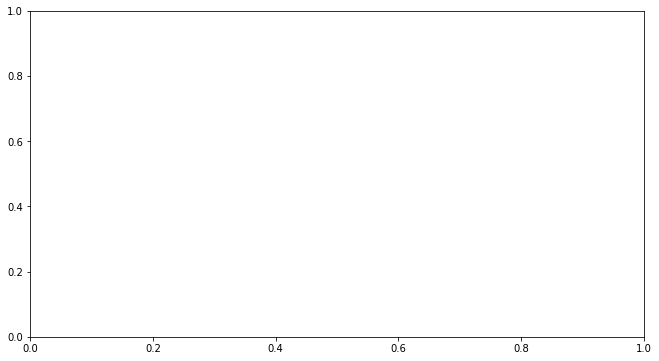

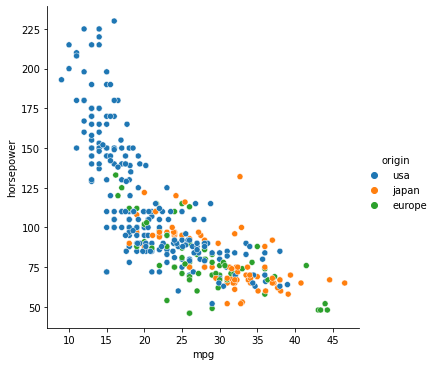

In [90]:
f, ax = plt.subplots(figsize=(11,6))

sns.relplot(x='mpg',
            y='horsepower',
            hue='origin',
            kind='scatter',
            data=df,
            ax=ax)

plt.show()

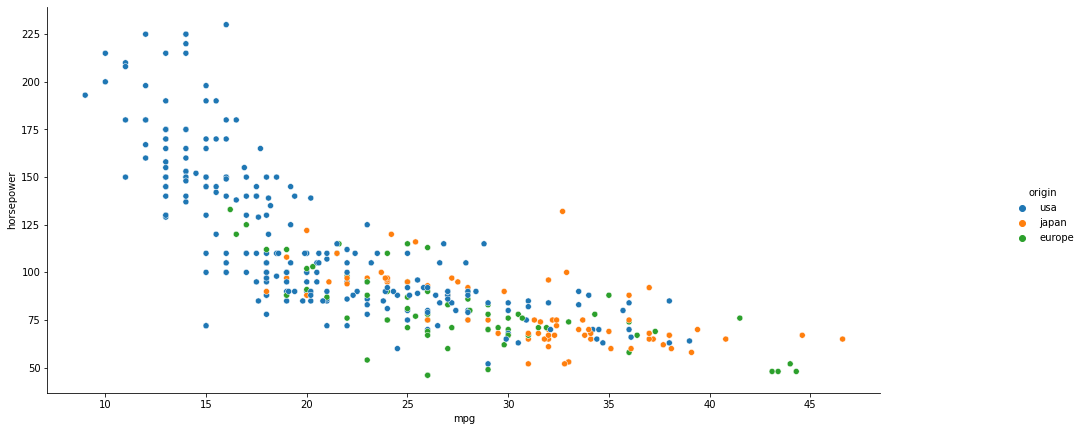

In [92]:
g = sns.relplot(x='mpg',
            y='horsepower',
            hue='origin',
            kind='scatter',
            data=df,
            ax=ax)

g.fig.set_size_inches(16,6)

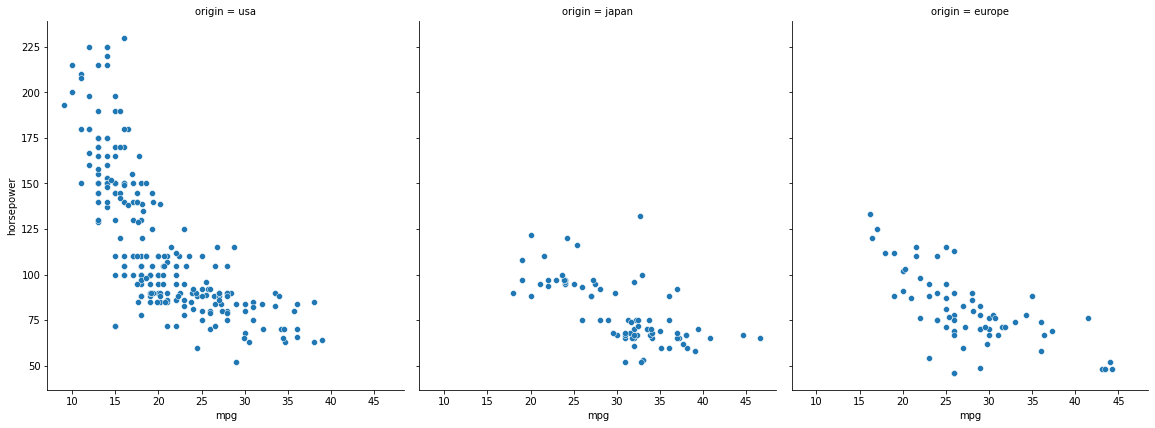

In [94]:
g = sns.relplot(x='mpg',
            y='horsepower',
            col='origin',
            kind='scatter',
            data=df,
            ax=ax)

g.fig.set_size_inches(16,6)

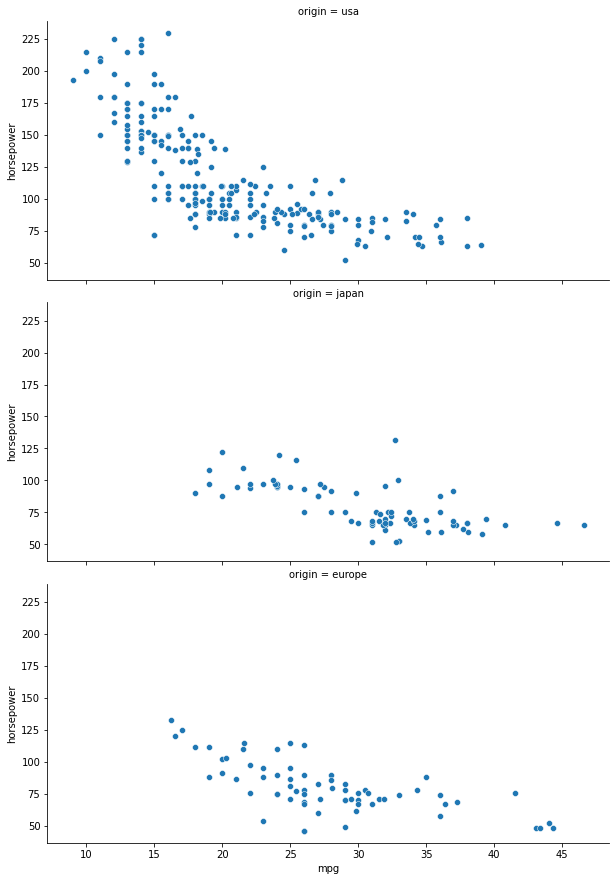

In [102]:
g = sns.relplot(x='mpg',
            y='horsepower',
            row='origin',
            kind='scatter',
            data=df,
            ax=ax)

g.fig.set_size_inches(9,12)

In [112]:
df.model_year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [113]:
def velho_novo(value):
    if value < 76:
        return 'velho'
    else:
        return 'novo'
    
df['modelo'] = df.model_year.apply(velho_novo)

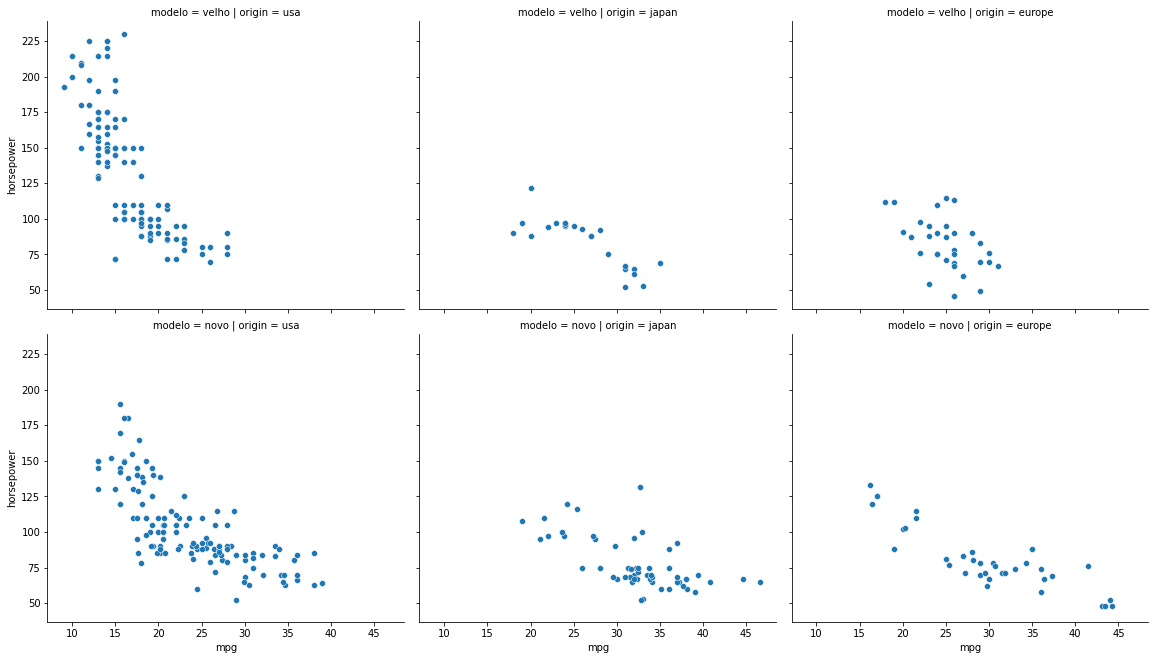

In [118]:
g = sns.relplot(x='mpg',
            y='horsepower',
            col='origin',
            row='modelo',
            kind='scatter',
            data=df,
            ax=ax)

g.fig.set_size_inches(16,9)

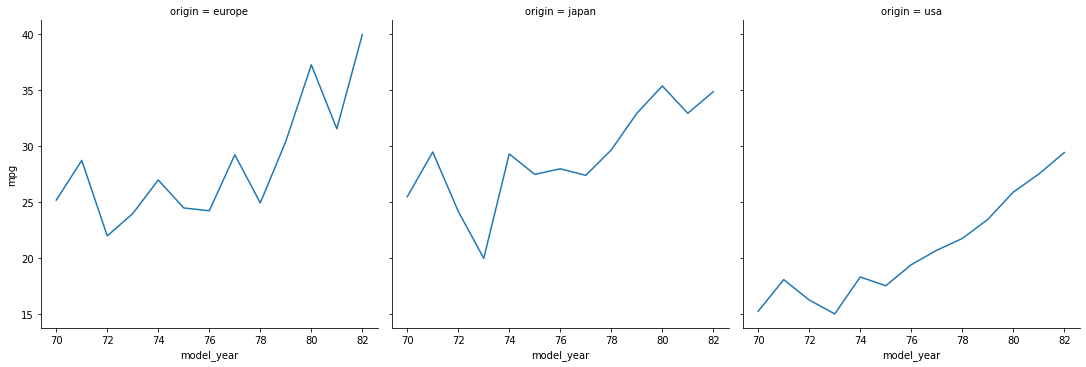

In [131]:
data = df[['model_year','mpg','origin']].groupby(['model_year','origin'],as_index=False).mean()

g = sns.relplot(x='model_year',y='mpg',col='origin',data=data,kind='line',markers=True)